# Logistic Regression From Scratch (with Numpy)

## Please note:

You will see some similarities between this code and the linear regression notebook code, this is because they actually work in very similar ways, despite being used for very different types of problems!


## Setup

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
Xtrain1 = np.array([1,3,4,5,7,8]) # initialising the values in the training set. this particular variable is feature 1
Xtrain2 = np.array([2,3,5,7,10,11]) # feature 2
y = np.array([0,0,0,1,1,1]) # the true label values

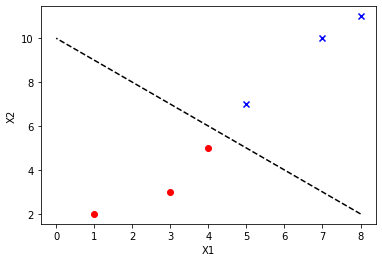

In [57]:
markers = ['o', 'x']  # 'o' for class 0, 'x' for class 1
colors = ['r', 'b']   # 'r' for class 0, 'b' for class 1

# Create the plot
fig, ax = plt.subplots()

# Scatter plot with different shapes and colors for y
for i in range(len(y)):
    ax.scatter(Xtrain1[i], Xtrain2[i], c=colors[y[i]], marker=markers[y[i]])

# Add the line from (7,0) to (0,7)
ax.plot([8, 0], [2, 10], 'k--')  # 'k--' for a black dashed line

ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.show()

## The Model

The logistic function looks like this: $$ \hat{y} = \frac{1}{1+e ^{-z}}$$
$$ \text{ where   } z = \overrightarrow{w}.\overrightarrow{x} + b $$

The task of the gradient descent algorithm is to find the suitable parameter values \(w\) and \(b\).

In order to find \(w\) and \(b\), one needs to minimize this loss function:

$$ \text{Binary Cross Entropy Loss} = -\frac{1}{m}\sum_i^m{( y.log(\hat{y}_i) + (1-y_i).log(1-\hat{y_i}))} $$


$$ \hat{y} $$ is the predicted value,
$$ y $$ is the actual value,
$$ m $$ is the number of observations

## The sigmoid function
The function  $$ g(z) = \frac{1}{1+e ^{-z}}$$
is known as the sigmoid function. As it is less affected by extreme values than a linear function, we use this for classification tasks.

## Example sigmoid graph

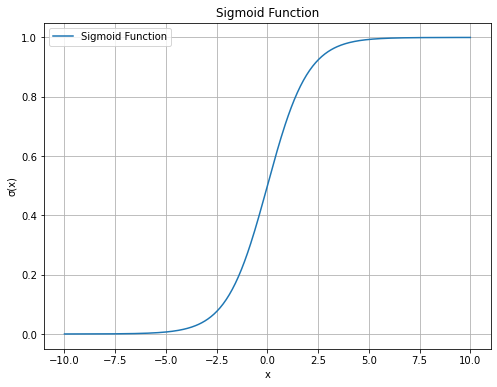

In [78]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 400)

y = sigmoid(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.legend()
plt.show()

## More setup

In [58]:
m = len(y)  # number of observations
alpha = 0.01  # learning rate for gradient descent
iterations = 15000  # Number of graident descent iterations 

In [59]:
#initialising the parameters

w1 = 0
w2 = 0
b = 0

In [60]:
def calculateyhat (X1, X2, w1, w2, b): # setting up a function to calculate the prediction of the model
    z = w1 * X1 + w2 * X2 + b
    yhat = 1 / (1 + np.exp(-z))
    return yhat

In [61]:
def logloss(yhat, yi): # setting up a function to calculate the cost of the model
    m = len(yi)
    logloss = - (1 / m) * np.sum(yi * np.log(yhat) + (1 - yi) * np.log(1 - yhat))
    return logloss
    

## Gradient descent

In order to minimise the cost function, we need to work out where the minmum point of the cost function J would be. 




## A hypothetical cost function plot

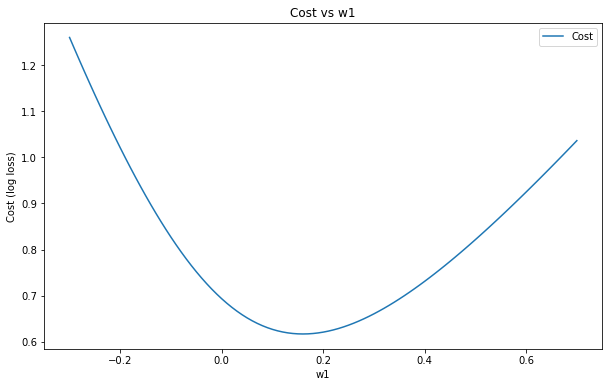

In [62]:
testcosts = {}

to_iter = np.arange(1, -0.01, -0.01) - 0.3
for w1 in to_iter:
    yh = calculateyhat(Xtrain1, Xtrain2, w1, w2, b)
    testcosts[w1] = logloss(yh, y)

# Plot costs vs w1 values
w1_values = list(testcosts.keys())
costs = list(testcosts.values())

plt.figure(figsize=(10, 6))
plt.plot(w1_values, costs, label='Cost')
plt.xlabel('w1')
plt.ylabel('Cost (log loss)')
plt.title('Cost vs w1')
plt.legend()
plt.show()

## Understanding the gradient descent process

The goal of gradient descent is to identify the minimum points of the log loss cost function. In reality we'll be doing this for w1, w2 and b. So it would not be a 2d graph, but there would still be a minimum point, as it is a convex function.

If we take a point on this graph, and identify gradient of the slope of that point, we can find the direction towards the minimum. Each step (iteration) of gradient descent will be a step in the direction of that minimum.

Getting the gradient means getting the partial deriviatives for w1, w2 and b

$$ \frac{dJ}{dw_1} = \frac {1}{m} \sum X_1((\hat{y} - y))  $$

$$ \frac{dJ}{dw_2} = \frac {1}{m} \sum X_2((\hat{y} - y))  $$

$$ \frac{dJ}{dw_b} = \frac {1}{m} \sum b((\hat{y} - y))  $$

We want to take a step in the direciton of the global minimum at each iteration of gradient descent. For example (where alpha is the learning rate):

$$ w_1 = w_1 - \alpha \frac{dJ}{dw_1} $$

In [63]:
costs = {}

# Gradient Descent
for iteration in range(iterations):
    yh = calculateyhat(Xtrain1, Xtrain2, w1, w2, b)
    m = y.shape[0]
    
    d_w1 = (1 / m) * np.sum((yh - y) * Xtrain1)
    d_w2 = (1 / m) * np.sum((yh - y) * Xtrain2)
    d_b = (1 / m) * np.sum(yh - y)
    
    w1 -= alpha * d_w1
    w2 -= alpha * d_w2
    b -= alpha * d_b
    
    cost = logloss(yh, y)  
    costs[iteration] = cost
        
    if iteration % 1000 == 0:
        print(f"iteration {iteration}. w1 = {w1} w2 = {w2} b = {b}. Cost = {cost}")
        
print(f"Final parameters. w1: {w1}, w2: {w2}, b: {b}")


iteration 0. w1 = -0.2742663279677837 w2 = 0.036402518198266114 b = 0.002798702935732987. Cost = 1.2604267566425194
iteration 1000. w1 = -0.4913271893823109 w2 = 0.6790081620038915 b = -1.394704075711493. Cost = 0.353403626413339
iteration 2000. w1 = -0.7235634812202243 w2 = 0.9852660437632411 b = -2.308623077392155. Cost = 0.25389064810907613
iteration 3000. w1 = -0.9000964714267127 w2 = 1.2158346415010495 b = -2.962816735948612. Cost = 0.20230563524367356
iteration 4000. w1 = -1.0466192949805793 w2 = 1.4036527563171894 b = -3.4697010719888177. Cost = 0.17080646622859946
iteration 5000. w1 = -1.1744388832462425 w2 = 1.5642750024065375 b = -3.8838849099922235. Cost = 0.14937944000513462
iteration 6000. w1 = -1.2893343324095219 w2 = 1.706011525381476 b = -4.234944063628777. Cost = 0.13369639677783682
iteration 7000. w1 = -1.3946289728313437 w2 = 1.8337764988188758 b = -4.540413529765185. Cost = 0.12160736346647016
iteration 8000. w1 = -1.492411006747237 w2 = 1.950710835412634 b = -4.811

In [64]:
## Plotting how cost decreases per iteration

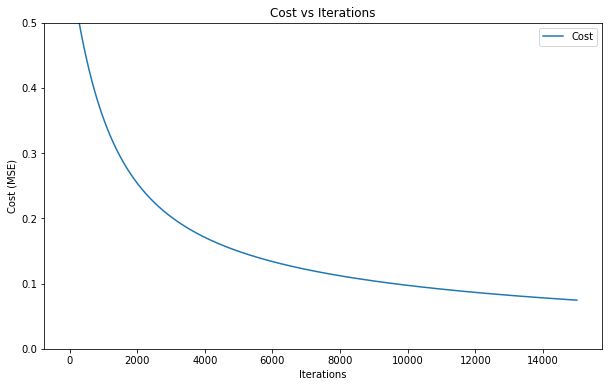

In [65]:
iterations_list = list(costs.keys())
costs_list = list(costs.values())

plt.figure(figsize=(10, 6))
plt.plot(iterations_list, costs_list, label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Iterations')
plt.legend()
plt.ylim(0,0.5)
plt.show()

## Plotting the model's predictions vs the actual values

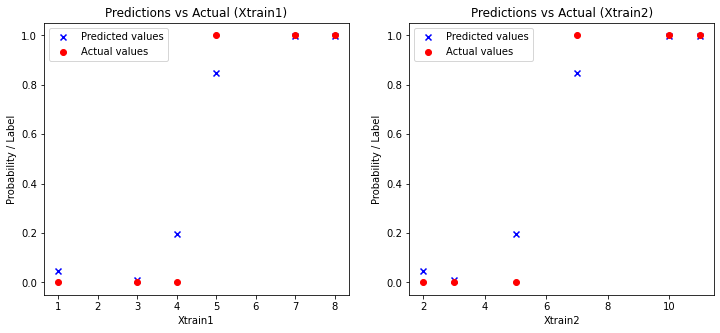

In [67]:
# Calculate final predictions
yh = calculateyhat(Xtrain1, Xtrain2, w1, w2, b)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Xtrain1 vs Predictions and Actual Values
ax[0].scatter(Xtrain1, yh, c='b', marker='x', label='Predicted values')
ax[0].scatter(Xtrain1, y, c='r', marker='o', label='Actual values')
ax[0].set_xlabel('Xtrain1')
ax[0].set_ylabel('Probability / Label')
ax[0].set_title('Predictions vs Actual (Xtrain1)')
ax[0].legend()

# Plot for Xtrain2 vs Predictions and Actual Values
ax[1].scatter(Xtrain2, yh, c='b', marker='x', label='Predicted values')
ax[1].scatter(Xtrain2, y, c='r', marker='o', label='Actual values')
ax[1].set_xlabel('Xtrain2')
ax[1].set_ylabel('Probability / Label')
ax[1].set_title('Predictions vs Actual (Xtrain2)')
ax[1].legend()

plt.show()

## Plotting predictions of unseen values

In [74]:
Xtest1 = np.array([2,2.3,2.5,2.7,3.0,3.2, 3.5,3.7,3.9,4.1,4.4,4.8])
Xtest2 = np.array([2.7, 2.9,3.3,3.7,3.9,4.4,5,5.5,5.8,6.2,6.5,7])
yhattest = calculateyhat(Xtest1, Xtest2, w1, w2, b)

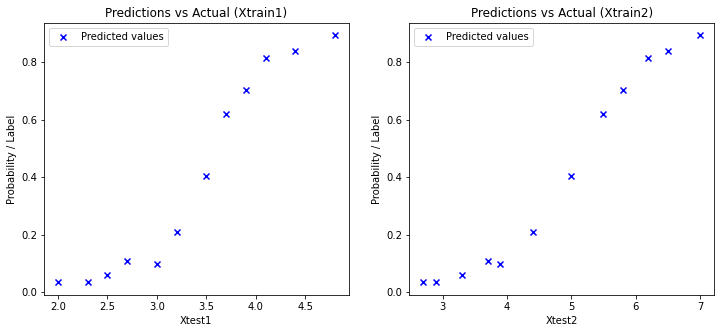

In [75]:

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Xtrain1 vs Predictions and Actual Values
ax[0].scatter(Xtest1, yhattest, c='b', marker='x', label='Predicted values')
ax[0].set_xlabel('Xtest1')
ax[0].set_ylabel('Probability / Label')
ax[0].set_title('Predictions vs Actual (Xtrain1)')
ax[0].legend()

# Plot for Xtrain2 vs Predictions and Actual Values
ax[1].scatter(Xtest2, yhattest, c='b', marker='x', label='Predicted values')
ax[1].set_xlabel('Xtest2')
ax[1].set_ylabel('Probability / Label')
ax[1].set_title('Predictions vs Actual (Xtrain2)')
ax[1].legend()

plt.show()

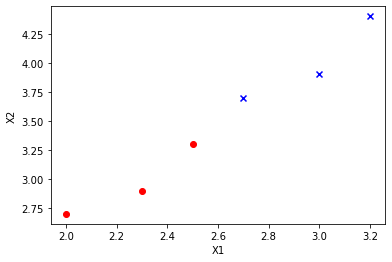

In [77]:
markers = ['o', 'x']  # 'o' for class 0, 'x' for class 1
colors = ['r', 'b']   # 'r' for class 0, 'b' for class 1

# Create the plot
fig, ax = plt.subplots()

# Scatter plot with different shapes and colors for y
for i in range(len(y)):
    ax.scatter(Xtest1[i], Xtest2[i], c=colors[y[i]], marker=markers[y[i]])


ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.show()

## That's all!

Now we can see that the model is making reasonable predictions on the unseen data, we know that the job here is done!